<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

%matplotlib inline

from collections import defaultdict


In [2]:
data = pd.read_csv('data/5000_movies_bis.csv')

In [3]:
data.shape

(5043, 28)

In [4]:
display(data.describe(exclude='object')); display(data.describe(include='object'))

,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.577000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.640000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.522261e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.938647e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.652850e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.041819e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.130000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,3.792188e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.178443e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,5.749100e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.400000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Home,Steve Coogan,based on novel,http://www.imdb.com/title/tt1976009/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [5]:
cat_cols = list(data.select_dtypes(include='object').columns)
num_cols = list(data.select_dtypes(exclude='object').columns)

print(f'Categorical columns: {cat_cols}')
print(f'Continuous columns: {num_cols}')

Categorical columns: ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']
Continuous columns: ['num_critic_for_reviews', 'duration', 'director_fb_likes', 'actor_3_fb_likes', 'actor_1_fb_likes', 'gross', 'num_voted_users', 'cast_total_fb_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score', 'aspect_ratio', 'movie_fb_likes']


In [6]:
data[cat_cols] = data[cat_cols].astype('category')

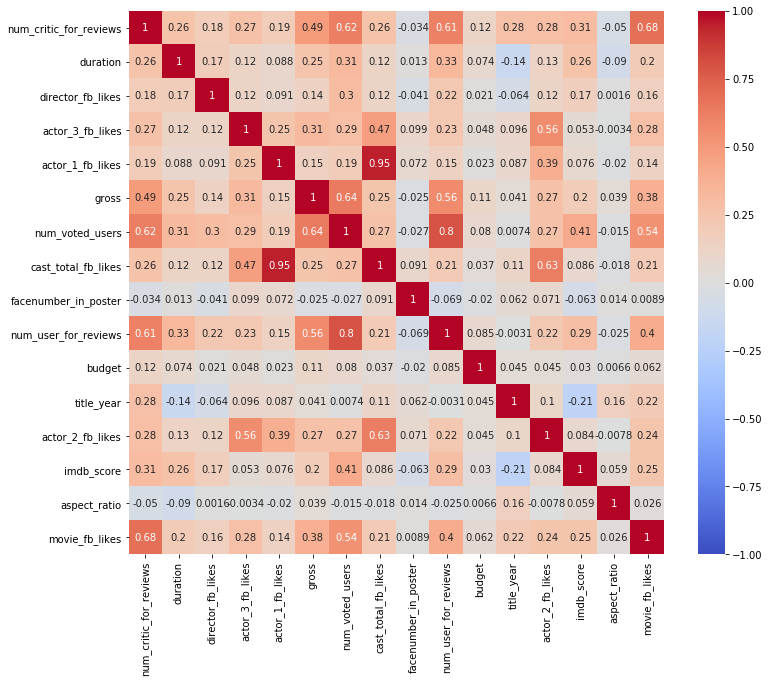

In [7]:
_, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data[num_cols].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=ax)

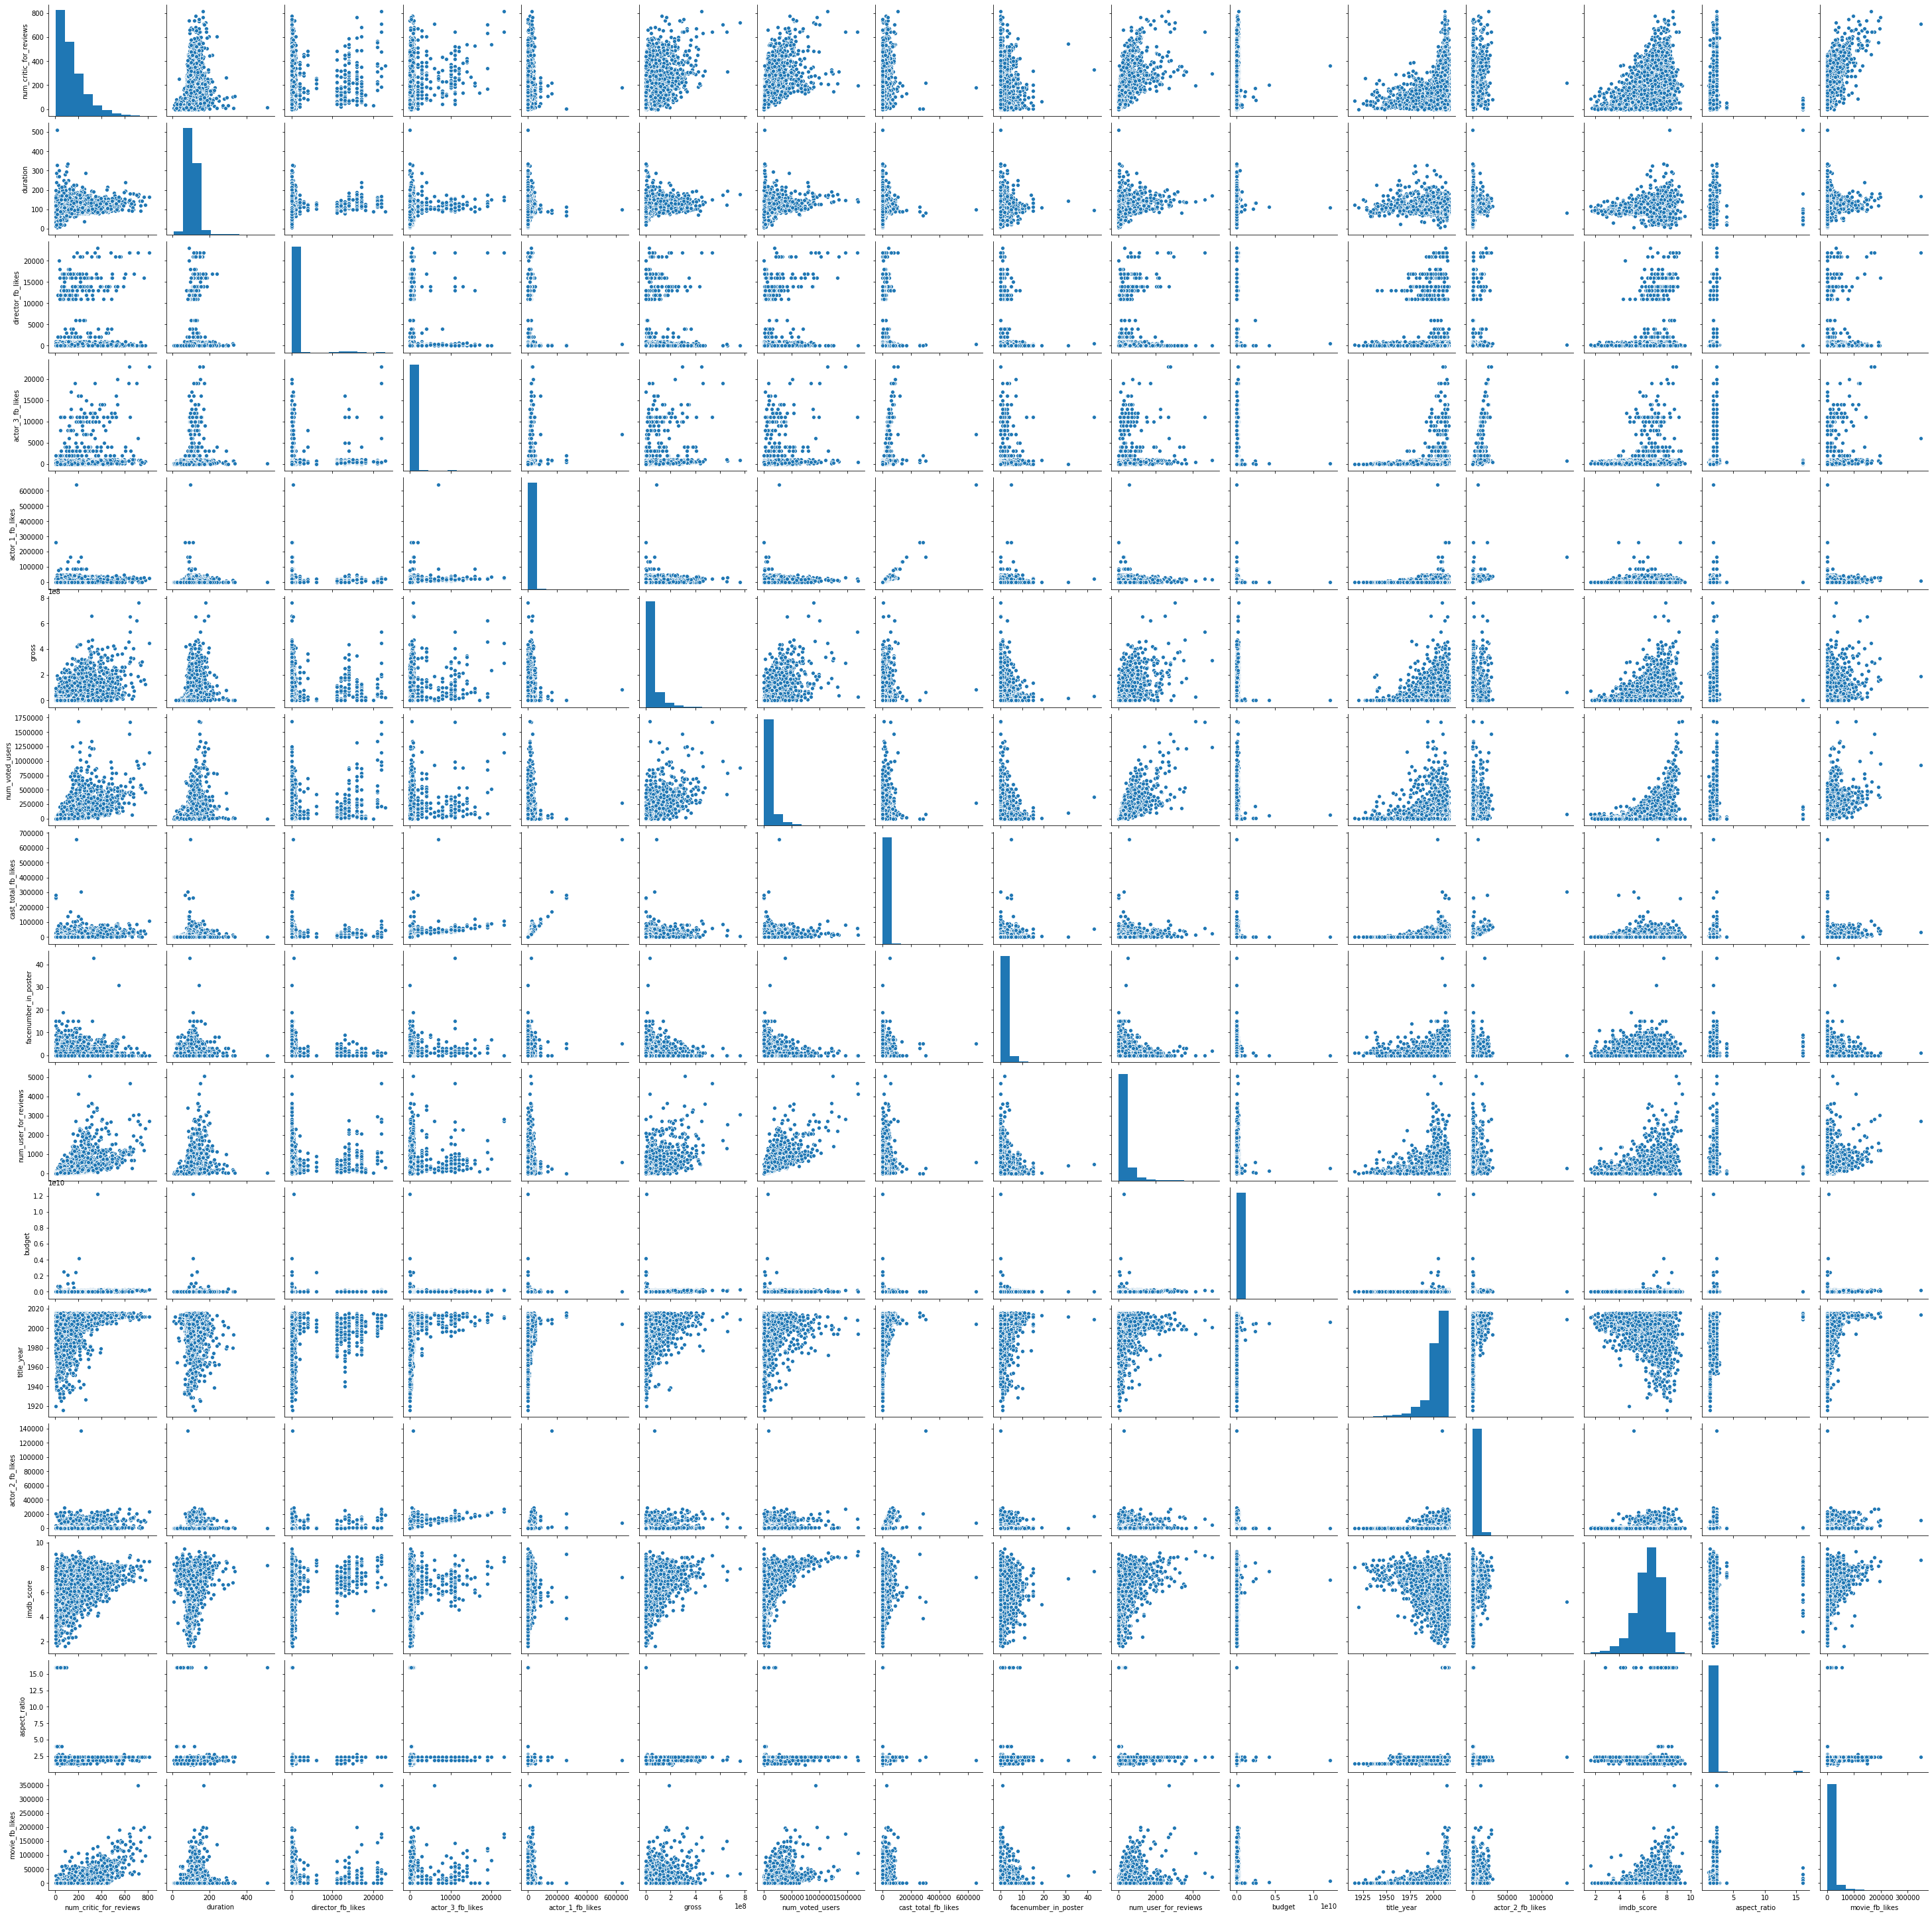

In [10]:
sns.pairplot(data[num_cols])

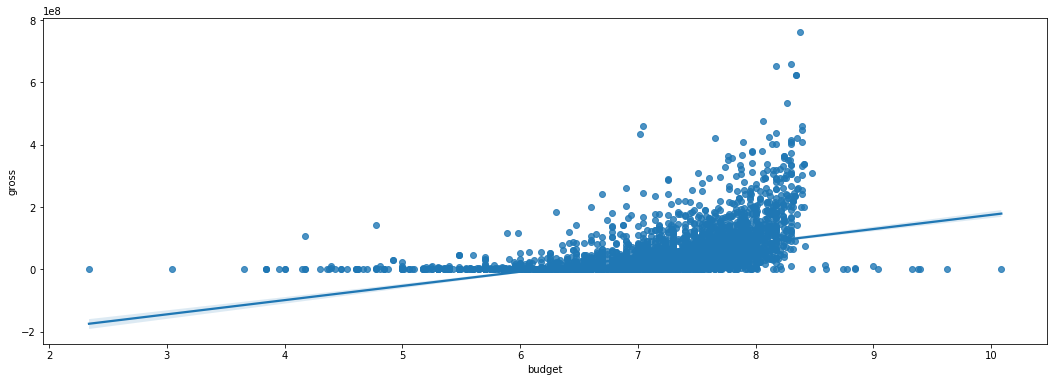

In [12]:
_, ax = plt.subplots(figsize=(18, 6))
sns.regplot(x=data['budget'].apply(np.log10), y=data['gross'], ax=ax)

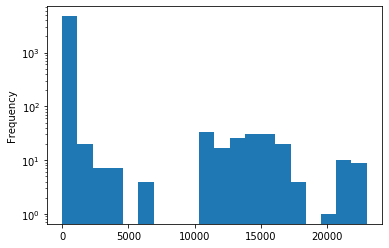

In [11]:
data['director_fb_likes'].plot.hist(bins=20, log=True)

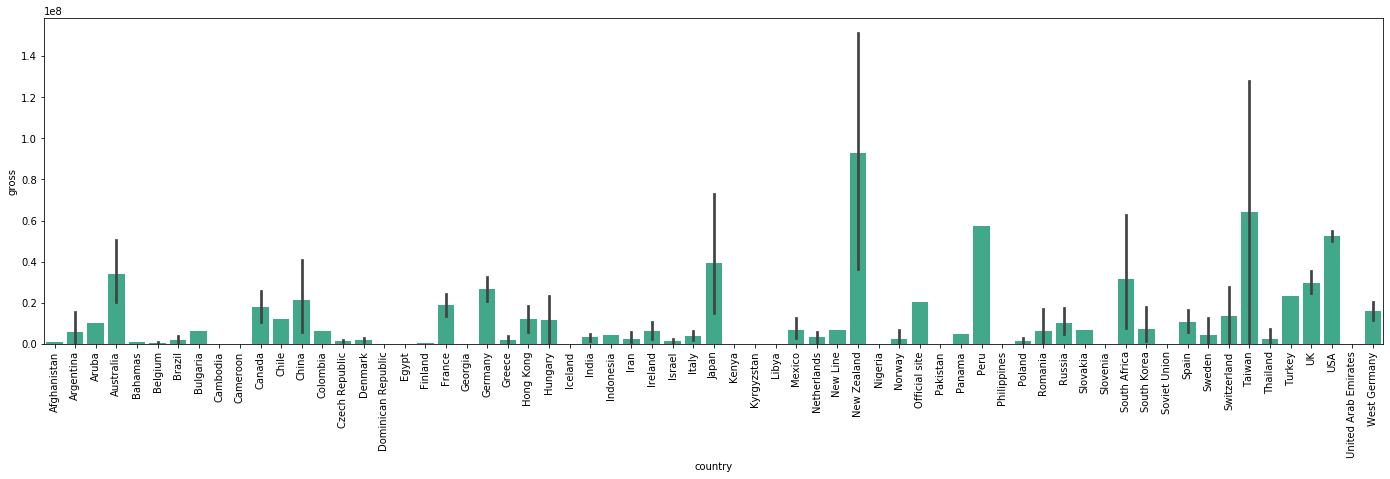

In [13]:
_, ax = plt.subplots(figsize=(24, 6))
sns.barplot(x='country', y='gross', data=data, ax=ax, color='#30BA8F')
_ = plt.xticks(rotation=90)

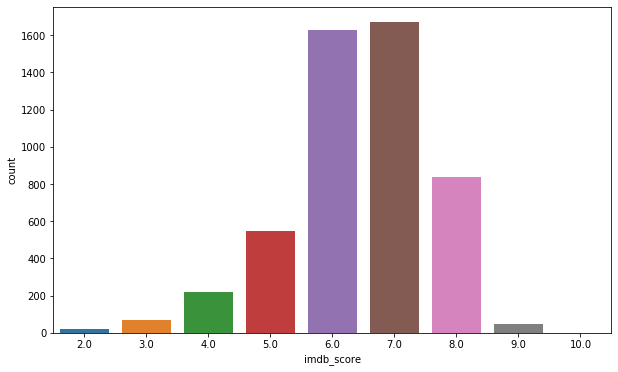

In [14]:
_, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=data['imdb_score'].apply(np.round).astype('category'), 
              ax=ax)

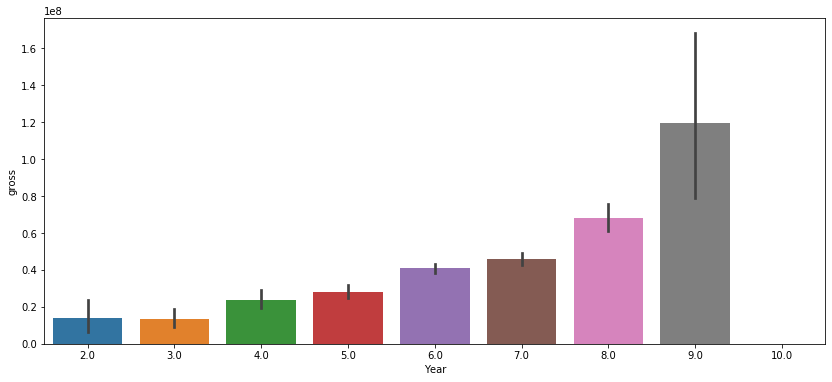

In [16]:
_, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x=data['imdb_score'].apply(np.round), y=data['gross'], ax=ax)

plt.xlabel('IMDB Score'); plt.xlabel('Year');

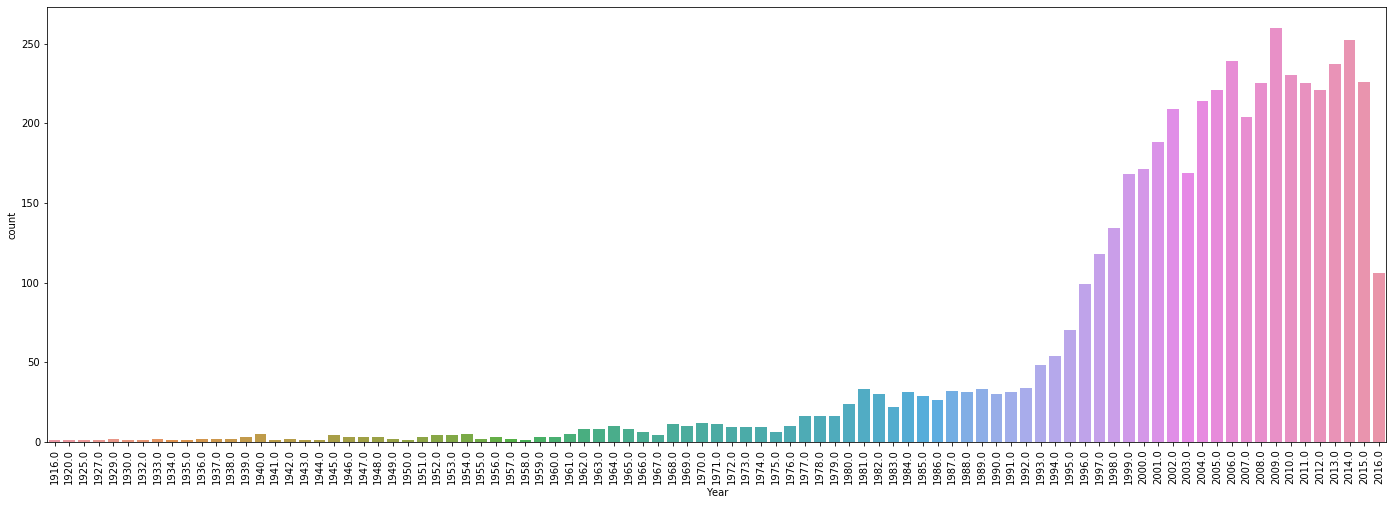

In [17]:
_, ax = plt.subplots(figsize=(24, 8))
sns.countplot(x=data['title_year'].astype('category'), ax=ax)
plt.xlabel('Year')
_ = plt.xticks(rotation=90)

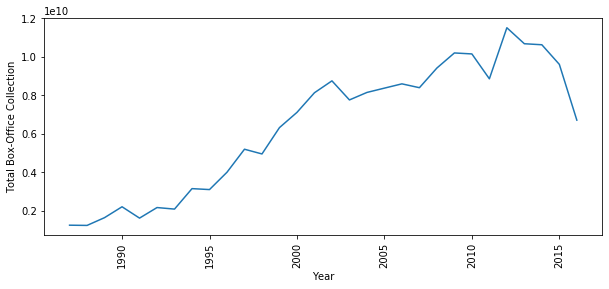

In [18]:
gb_mean = data.groupby(['title_year'])['gross'].sum()

plt.figure(figsize=(10, 4))
gb_mean.iloc[-30:].plot()
plt.ylabel('Total Box-Office Collection')
plt.xlabel('Year')
_ = plt.xticks(rotation=90)

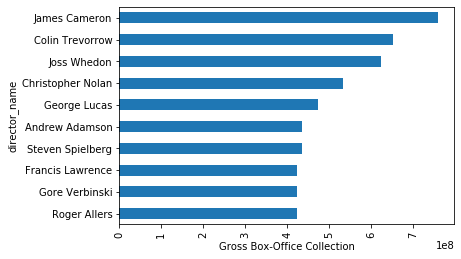

In [19]:
gb_mean = data.groupby(['director_name'])['gross'].max().dropna().sort_values(ascending=True).tail(10)

plt.figure(figsize=(6, 4))
gb_mean.plot.barh()
plt.xlabel('Gross Box-Office Collection')
_ = plt.xticks(rotation=90)

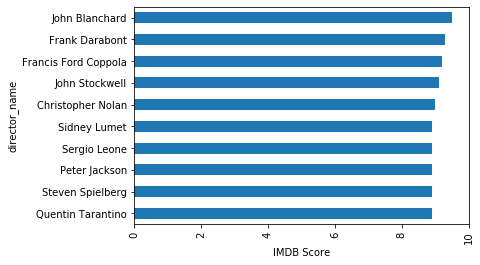

In [20]:
gb_mean = data.groupby(['director_name'])['imdb_score'].max().dropna().sort_values(ascending=True).tail(10)

plt.figure(figsize=(6, 4))
gb_mean.plot.barh()
plt.xlim(right=10)
plt.xlabel('IMDB Score')
_ = plt.xticks(rotation=90)

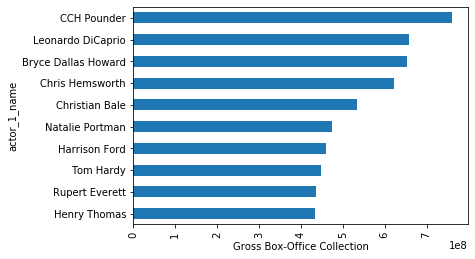

In [21]:
gb_mean = data.groupby(['actor_1_name'])['gross'].max().dropna().sort_values(ascending=True).tail(10)

plt.figure(figsize=(6, 4))
gb_mean.plot.barh()
plt.xlabel('Gross Box-Office Collection')
_ = plt.xticks(rotation=90)

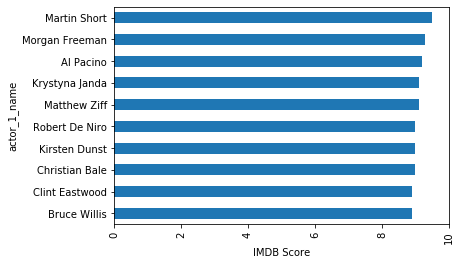

In [22]:
gb_mean = data.groupby(['actor_1_name'])['imdb_score'].max().dropna().sort_values(ascending=True).tail(10)

plt.figure(figsize=(6, 4))
gb_mean.plot.barh()
plt.xlim(right=10)
plt.xlabel('IMDB Score')
_ = plt.xticks(rotation=90)

In [24]:
d = defaultdict(list)

tmp = data['genres'].str.split('|')
tmp_dict = tmp.to_dict()

for idx, genres in tmp_dict.items():
    for g in genres:
        d[g].append(idx)

In [25]:
total_gross_per_genre = pd.DataFrame([[genre, data.loc[d[genre]].gross.sum()] for genre in d.keys()], columns=['genre', 'gross_mean'])
total_gross_per_genre = total_gross_per_genre.dropna().sort_values(by='gross_mean').reset_index(drop=True)
# total_gross_per_genre

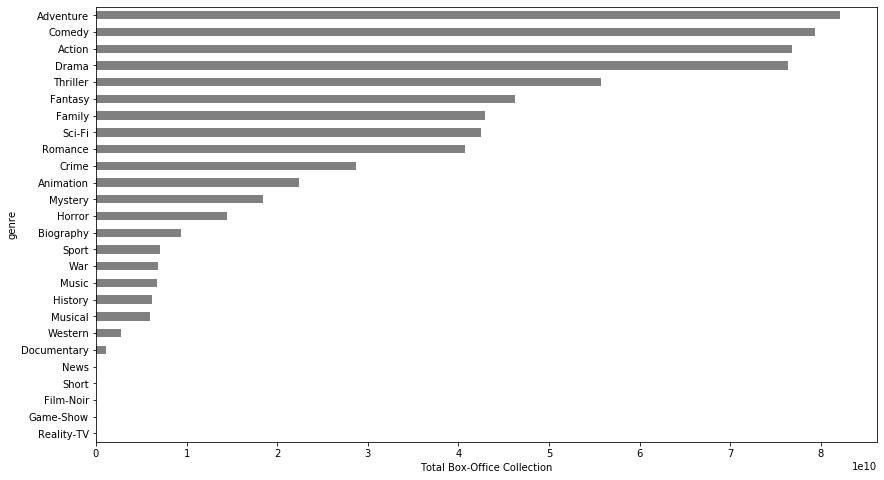

In [26]:
total_gross_per_genre.plot.barh(x='genre', y='gross_mean', figsize=(14, 8), color=['gray'], legend=False)
plt.xlabel('Total Box-Office Collection');